In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import clone
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

C:\Users\Ahmed\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
rs = 0 
df = pd.read_csv("MCSDatasetNEXTCONLab.csv")
df['Ligitimacy'] = df['Ligitimacy'].replace(0,-1)
trDf = df[:10139][:] 
teDf = df[10139:][:] 
trDf = trDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
trDf = trDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)
teDf = teDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x) 
teDf = teDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)
trY = trDf['Ligitimacy'].values
teY = teDf['Ligitimacy'].values
trX = trDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values
teX = teDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values

In [3]:
train_y =pd.DataFrame(trY,columns = ["Ligitimacy"])
train_y['Ligitimacy'].value_counts()

 1    8839
-1    1300
Name: Ligitimacy, dtype: int64

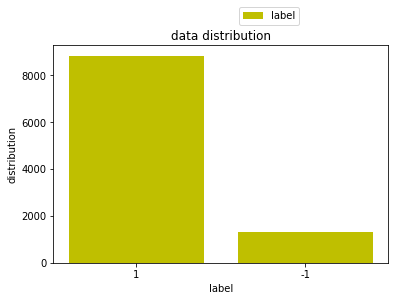

In [102]:
x = np.arange(2)
plt.bar(x, train_y['Ligitimacy'].value_counts(),color='y')
plt.xticks(x,[1,-1])
plt.xlabel("label")
plt.ylabel("distribution")
plt.title('data distribution')
plt.legend(["label"],bbox_to_anchor =(0.75, 1.2))
plt.show()

**part1**

q1

In [4]:
estimator=[]
accuracy=[]

Accuracy Score:98.1%
              precision    recall  f1-score   support

          -1       0.88      0.99      0.93       597
           1       1.00      0.98      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.94      0.98      0.96      4345
weighted avg       0.98      0.98      0.98      4345

[[ 591    6]
 [  77 3671]]


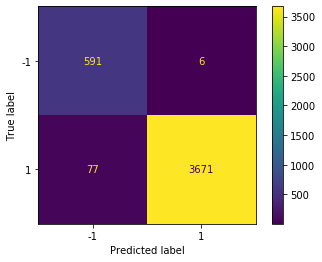

In [5]:
estimator_KNN = KNeighborsClassifier()
estimator_KNN.fit(trX, trY)
y_pred_KNN = estimator_KNN.predict(teX)
KNN_Accuracy = accuracy_score(teY, y_pred_KNN)*100
print(f'Accuracy Score:{KNN_Accuracy:.1f}%')
print(classification_report(teY, y_pred_KNN))
print(confusion_matrix(teY, y_pred_KNN))
plot_confusion_matrix(estimator_KNN, teX, teY)
estimator.append("KNN")
accuracy.append(KNN_Accuracy)

Accuracy Score:94.4%
              precision    recall  f1-score   support

          -1       0.84      0.73      0.78       597
           1       0.96      0.98      0.97      3748

    accuracy                           0.94      4345
   macro avg       0.90      0.85      0.87      4345
weighted avg       0.94      0.94      0.94      4345

[[ 433  164]
 [  81 3667]]


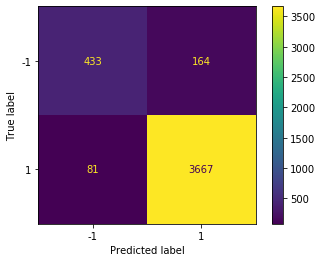

In [6]:
estimator_DT = DecisionTreeClassifier(random_state=rs)
estimator_DT.fit(trX, trY)
y_pred_DT = estimator_DT.predict(teX)
DT_Accuracy = accuracy_score(teY, y_pred_DT)*100
print(f'Accuracy Score:{DT_Accuracy:.1f}%')
print(classification_report(teY, y_pred_DT))
print(confusion_matrix(teY, y_pred_DT))
plot_confusion_matrix(estimator_DT, teX, teY)
estimator.append("DecisionTree")
accuracy.append(DT_Accuracy)

Accuracy Score:95.3%
              precision    recall  f1-score   support

          -1       0.86      0.78      0.82       597
           1       0.97      0.98      0.97      3748

    accuracy                           0.95      4345
   macro avg       0.91      0.88      0.90      4345
weighted avg       0.95      0.95      0.95      4345

[[ 466  131]
 [  74 3674]]


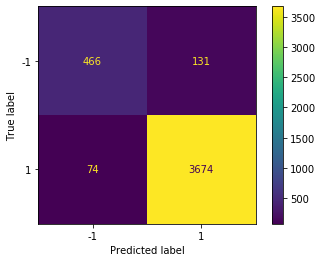

In [7]:
estimator_ADA = AdaBoostClassifier(random_state=rs)
estimator_ADA.fit(trX, trY)
y_pred_ADA = estimator_ADA.predict(teX)
ADA_Accuracy = accuracy_score(teY, y_pred_ADA)*100
print(f'Accuracy Score:{ADA_Accuracy:.1f}%')
print(classification_report(teY, y_pred_ADA))
print(confusion_matrix(teY, y_pred_ADA))
plot_confusion_matrix(estimator_ADA, teX, teY)
estimator.append("AdaBoost")
accuracy.append(ADA_Accuracy)

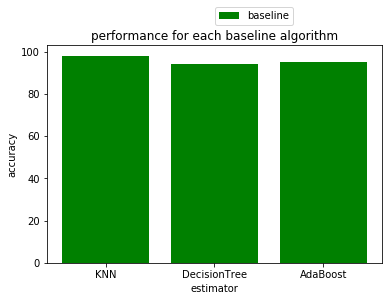

In [8]:
x = np.arange(3)
plt.bar(x, accuracy,color='green')
plt.xticks(x,estimator)
plt.xlabel("estimator")
plt.ylabel("accuracy")
plt.title('performance for each baseline algorithm')
plt.legend(["baseline"],bbox_to_anchor =(0.75, 1.2))
plt.show()

q2

,ADASYN_KNeighborsClassifier,ADASYN_DecisionTreeClassifier,ADASYN_AdaBoostClassifier,SMOTE_KNeighborsClassifier,SMOTE_DecisionTreeClassifier,SMOTE_AdaBoostClassifier,RandomUnderSampler_KNeighborsClassifier,RandomUnderSampler_DecisionTreeClassifier,RandomUnderSampler_AdaBoostClassifier
0,97.790564,93.785961,93.187572,97.767549,93.233602,92.174914,95.304948,88.285386,91.300345


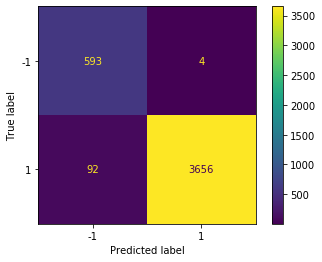

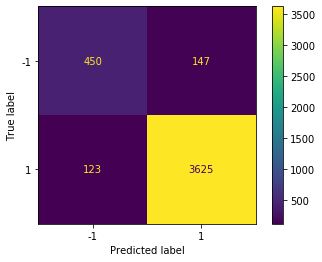

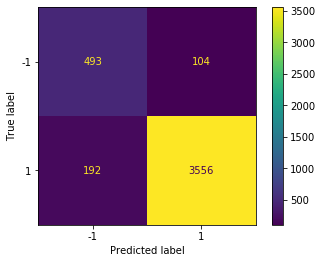

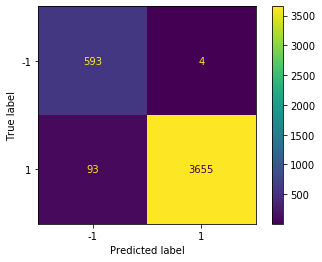

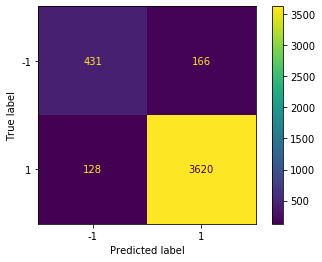

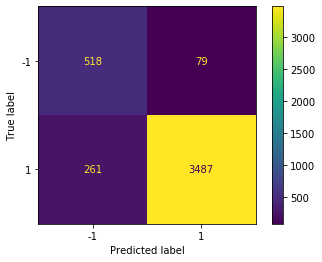

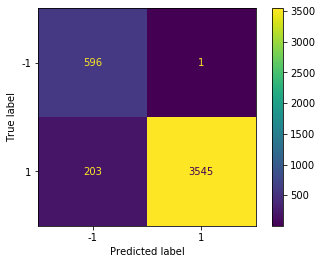

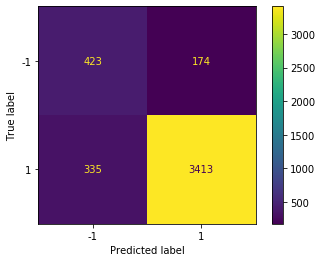

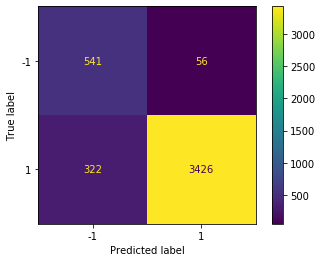

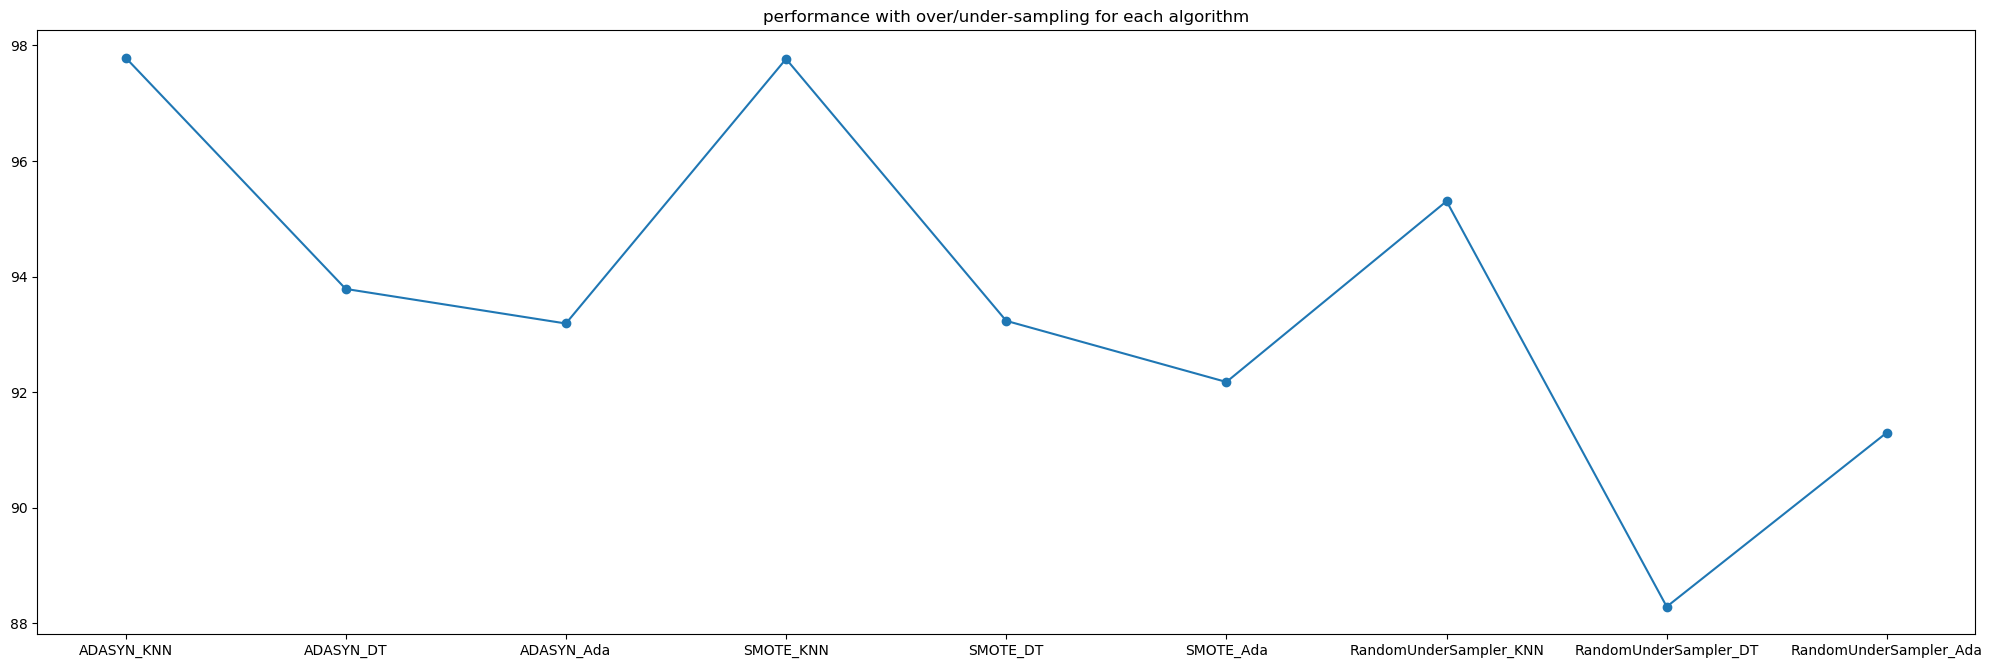

In [9]:
results = dict()
for resampler in [
                  ADASYN(random_state=rs),
                  SMOTE(random_state=rs),
                  RandomUnderSampler(random_state=rs)
]:
  reTrX, reTrY = resampler.fit_resample(trX, trY)
  for estimators in [
                KNeighborsClassifier(),
                DecisionTreeClassifier(random_state=rs),
                AdaBoostClassifier(random_state=rs)
  ]:
    score = estimators.fit(reTrX, reTrY).score(teX, teY)*100
    plot_confusion_matrix(estimators, teX, teY)
    results[f'{resampler.__class__.__name__}_{estimators.__class__.__name__}'] = score
plt.figure(figsize=(25,8), dpi=100)
x = np.arange(9)
plt.plot(x, list(results.values()),marker='o')
plt.xticks(x,["ADASYN_KNN","ADASYN_DT","ADASYN_Ada","SMOTE_KNN","SMOTE_DT","SMOTE_Ada","RandomUnderSampler_KNN","RandomUnderSampler_DT","RandomUnderSampler_Ada"])
plt.title('performance with over/under-sampling for each algorithm')
results_df = pd.DataFrame([results])
results_df

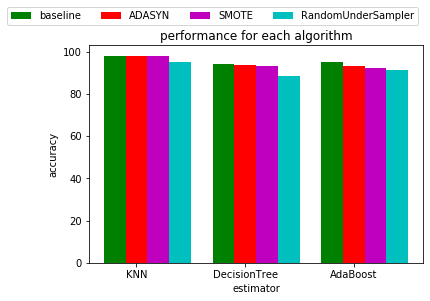

In [10]:
values__accuracy=list(results.values())
x = np.arange(3)
plt.bar(x-0.2,accuracy,width = 0.2,color='green')
plt.bar(x,values__accuracy[0:3],width = 0.2,color='red')
plt.bar(x+0.2,values__accuracy[3:6],width = 0.2,color='m')
plt.bar(x+0.4,values__accuracy[6:9],width = 0.2,color='c')
plt.xticks(x,estimator)
plt.xlabel('estimator')
plt.ylabel("accuracy")
plt.title('performance for each algorithm')
plt.legend(["baseline","ADASYN","SMOTE","RandomUnderSampler"],bbox_to_anchor =(1, 1.2),ncol = 4)
plt.show()

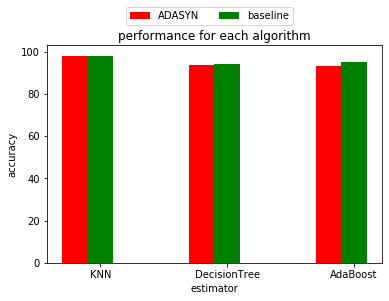

In [11]:
values_accuracy=list(results.values())
values_accuracy=np.array(values_accuracy)
values_accuracy=values_accuracy.reshape(3,3)
y=list()
y.append(max(values_accuracy[:,0]))
y.append(max(values_accuracy[:,1]))
y.append(max(values_accuracy[:,2]))
x = np.arange(3)
plt.bar(x-0.2,y,width = 0.2,color='red')
plt.bar(x,accuracy,width = 0.2,color='green')
plt.xticks(x,estimator)
plt.xlabel('estimator')
plt.ylabel("accuracy")
plt.title('performance for each algorithm')
plt.legend(["ADASYN","baseline"],bbox_to_anchor =(0.75, 1.2),ncol = 2)
plt.show()

In [12]:
resample=ADASYN(random_state=rs)
re_TrX, re_TrY = resample.fit_resample(trX, trY)

In [13]:
re_train_y =pd.DataFrame(re_TrY,columns = ["Ligitimacy"])
re_train_y['Ligitimacy'].value_counts()

-1    8879
 1    8839
Name: Ligitimacy, dtype: int64

**q3**

In [14]:
def apply_pca(model):
    model_scores=[]
    for i in range(3,11):
      pca = PCA(n_components=i)
      x_train_pca = pca.fit_transform(re_TrX)
      x_test_pca = pca.transform(teX)
      model.fit(x_train_pca,re_TrY)
      yPred_pca = model.predict(x_test_pca)
      acc_pca = accuracy_score(teY, yPred_pca)*100
      model_scores.append(acc_pca)
    max_accuracy=max(model_scores)
    index_best_com = model_scores.index(max_accuracy)+3
    # Plot a simple line chart
    plt.plot(range(3,11), model_scores, 'b', label='pca')
    plt.xlabel("Number of Features", fontsize=16)
    plt.ylabel("Accuracy (%)", fontsize=16) 
    plt.legend()
    plt.title('performance with pca for each algorithm')
    plt.show()
    return index_best_com,max_accuracy

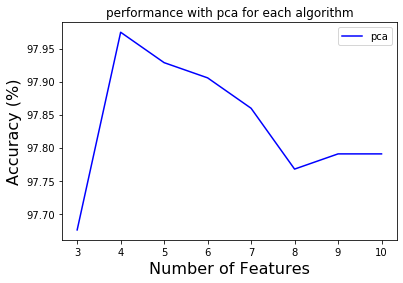

Maximum accuracy: 98.0% 
Best number of features: 4


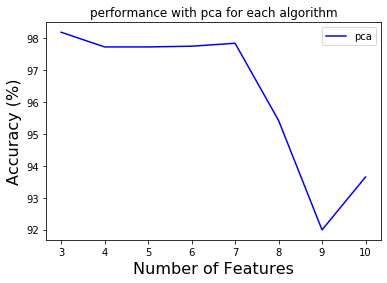

Maximum accuracy: 98.2% 
Best number of features: 3


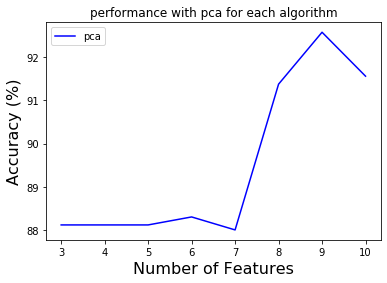

Maximum accuracy: 92.6% 
Best number of features: 9


In [15]:
score_model=[]
estimator_KNN_pca = KNeighborsClassifier()
component_num_KNN_pca,acc_KNN_pca = apply_pca(estimator_KNN_pca)
print(f"Maximum accuracy: {acc_KNN_pca:.1f}% \nBest number of features: {component_num_KNN_pca}")
score_model.append(acc_KNN_pca)

estimator_DT_pca=DecisionTreeClassifier(random_state=rs)
component_num_DT_pca,acc_DT_pca = apply_pca(estimator_DT_pca)
print(f"Maximum accuracy: {acc_DT_pca:.1f}% \nBest number of features: {component_num_DT_pca}")
score_model.append(acc_DT_pca)

estimator_ADA_pca=AdaBoostClassifier(random_state=rs)
component_num_Ada_pca,acc_Ada_pca = apply_pca(estimator_ADA_pca)
print(f"Maximum accuracy: {acc_Ada_pca:.1f}% \nBest number of features: {component_num_Ada_pca}")
score_model.append(acc_Ada_pca)

Accuracy Score:98.0%
              precision    recall  f1-score   support

          -1       0.88      0.98      0.93       597
           1       1.00      0.98      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.94      0.98      0.96      4345
weighted avg       0.98      0.98      0.98      4345

[[ 588    9]
 [  79 3669]]


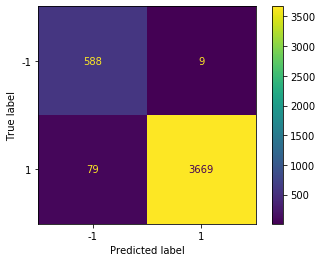

In [16]:
pca__4 = PCA(n_components=4)
x_train_pca4 = pca__4.fit_transform(re_TrX)
x_test_pca4 = pca__4.transform(teX)
estimator_KNN_pca4 = KNeighborsClassifier()
estimator_KNN_pca4.fit(x_train_pca4, re_TrY)
y_pred_KNN_pca = estimator_KNN_pca4.predict(x_test_pca4)
KNN_Accuracy_pca4 = accuracy_score(teY, y_pred_KNN_pca)*100
print(f'Accuracy Score:{KNN_Accuracy_pca4:.1f}%')
print(classification_report(teY, y_pred_KNN_pca))
print(confusion_matrix(teY, y_pred_KNN_pca))
plot_confusion_matrix(estimator_KNN_pca4, x_test_pca4, teY)

Accuracy Score:98.2%
              precision    recall  f1-score   support

          -1       0.94      0.93      0.93       597
           1       0.99      0.99      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.96      0.96      0.96      4345
weighted avg       0.98      0.98      0.98      4345

[[ 553   44]
 [  35 3713]]


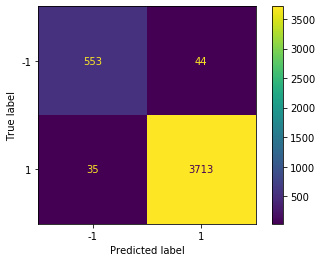

In [17]:
pca__3=PCA(n_components=3)
x_train_pc3=pca__3.fit_transform(re_TrX)
x_test_pca3=pca__3.transform(teX)
estimator_DT_pca3 = DecisionTreeClassifier(random_state=rs)
estimator_DT_pca3.fit(x_train_pc3,re_TrY)
y_pred_DT_pca3 = estimator_DT_pca3.predict(x_test_pca3)
DT_Accuracy_pca3 = accuracy_score(teY, y_pred_DT_pca3)*100
print(f'Accuracy Score:{DT_Accuracy_pca3:.1f}%')
print(classification_report(teY, y_pred_DT_pca3))
print(confusion_matrix(teY, y_pred_DT_pca3))
plot_confusion_matrix(estimator_DT_pca3, x_test_pca3, teY)

Accuracy Score:92.6%
              precision    recall  f1-score   support

          -1       0.68      0.86      0.76       597
           1       0.98      0.94      0.96      3748

    accuracy                           0.93      4345
   macro avg       0.83      0.90      0.86      4345
weighted avg       0.94      0.93      0.93      4345

[[ 513   84]
 [ 239 3509]]


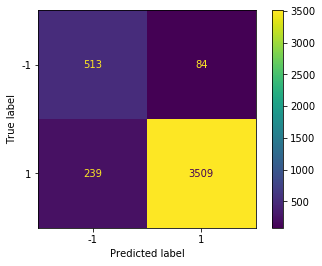

In [18]:
pca__9 = PCA(n_components=9)
x_train_pca9 = pca__9.fit_transform(re_TrX)
x_test_pca9 = pca__9.transform(teX)
estimator_ADA_pca9 = AdaBoostClassifier(random_state=rs)
estimator_ADA_pca9.fit(x_train_pca9,re_TrY)
y_pred_ADA_pca9 = estimator_ADA_pca9.predict(x_test_pca9)
ADA_Accuracy_pca9 = accuracy_score(teY, y_pred_ADA_pca9)*100
print(f'Accuracy Score:{ADA_Accuracy_pca9:.1f}%')
print(classification_report(teY, y_pred_ADA_pca9))
print(confusion_matrix(teY, y_pred_ADA_pca9))
plot_confusion_matrix(estimator_ADA_pca9, x_test_pca9, teY)

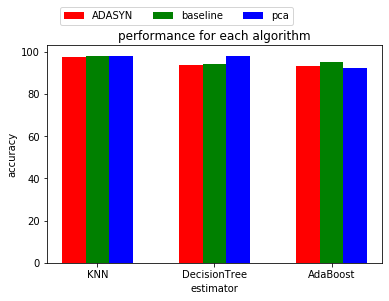

In [19]:
x = np.arange(3)
plt.bar(x-0.2,y,width = 0.2,color='red')
plt.bar(x,accuracy,width = 0.2,color='green')
plt.bar(x+0.2,score_model,width = 0.2,color='blue')
plt.xticks(x,estimator)
plt.xlabel('estimator')
plt.ylabel("accuracy")
plt.title('performance for each algorithm')
plt.legend(["ADASYN","baseline","pca"],bbox_to_anchor =(0.75, 1.2),ncol = 3)
plt.show()

### before pca

Text(0.5, 1.0, 't-SNE Before pca on trainning Data')

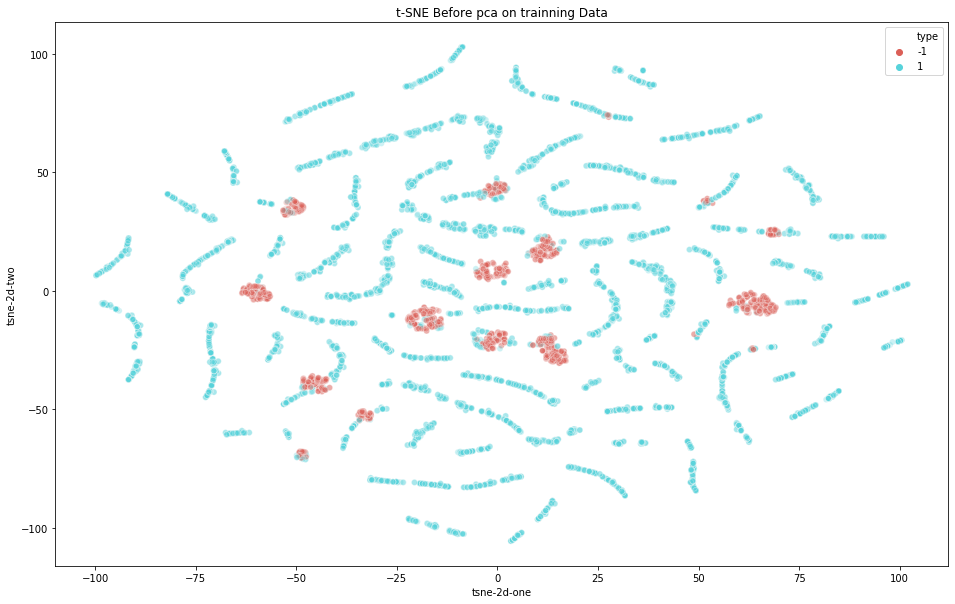

In [20]:
x_tsne_train=TSNE(n_components=2, random_state=0).fit_transform(trX)
train_ts=pd.DataFrame()
train_ts['tsne-2d-one'] = x_tsne_train[:,0]
train_ts['tsne-2d-two'] = x_tsne_train[:,1]
train_ts['type']=trY
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="type",
    palette=sns.color_palette("hls", 2),
    data=train_ts,
    legend="full",
    alpha=0.3
)
plt.title('t-SNE Before pca on trainning Data')

Text(0.5, 1.0, 't-SNE Before pca on testing Data')

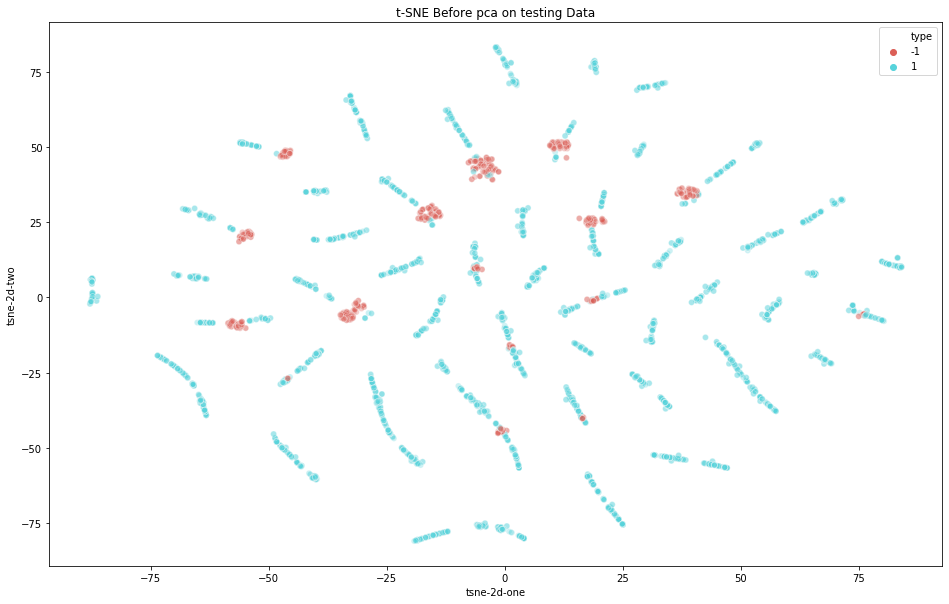

In [21]:
x_tsne_test=TSNE(n_components=2, random_state=0).fit_transform(teX)
test_ts=pd.DataFrame()
test_ts['tsne-2d-one'] = x_tsne_test[:,0]
test_ts['tsne-2d-two'] = x_tsne_test[:,1]
test_ts['type']=teY
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="type",
    palette=sns.color_palette("hls", 2),
    data=test_ts,
    legend="full",
    alpha=0.3
)
plt.title('t-SNE Before pca on testing Data')

**after applying pca**

**n_components=3**

Text(0.5, 1.0, 't-SNE After pca on trainning Data')

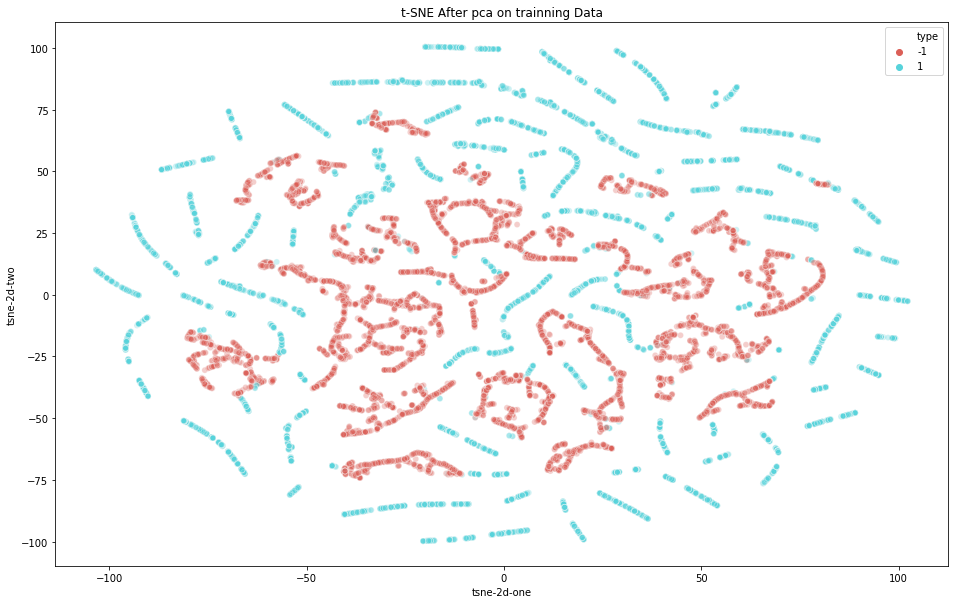

In [22]:
pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(re_TrX)
x_test_pca = pca.transform(teX)
x_tsne_train_pca=TSNE(n_components=2, random_state=0).fit_transform(x_train_pca)
train_ts_pca=pd.DataFrame()
train_ts_pca['tsne-2d-one'] = x_tsne_train_pca[:,0]
train_ts_pca['tsne-2d-two'] = x_tsne_train_pca[:,1]
train_ts_pca['type']=re_TrY
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="type",
    palette=sns.color_palette("hls", 2),
    data=train_ts_pca,
    legend="full",
    alpha=0.3
)
plt.title('t-SNE After pca on trainning Data')

Text(0.5, 1.0, 't-SNE After pca on testing Data')

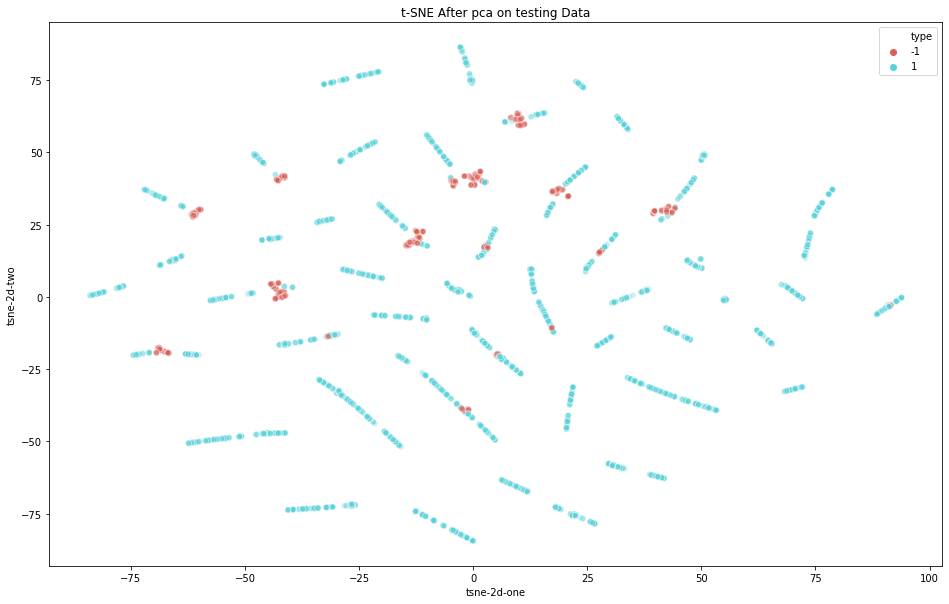

In [23]:
x_tsne_test_pca=TSNE(n_components=2, random_state=0).fit_transform(x_test_pca)
test_ts_pca=pd.DataFrame()
test_ts_pca['tsne-2d-one'] = x_tsne_test_pca[:,0]
test_ts_pca['tsne-2d-two'] = x_tsne_test_pca[:,1]
test_ts_pca['type']=teY
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="type",
    palette=sns.color_palette("hls", 2),
    data=test_ts_pca,
    legend="full",
    alpha=0.3
)
plt.title('t-SNE After pca on testing Data')

### n_components=7

Text(0.5, 1.0, 't-SNE After pca on trainning Data')

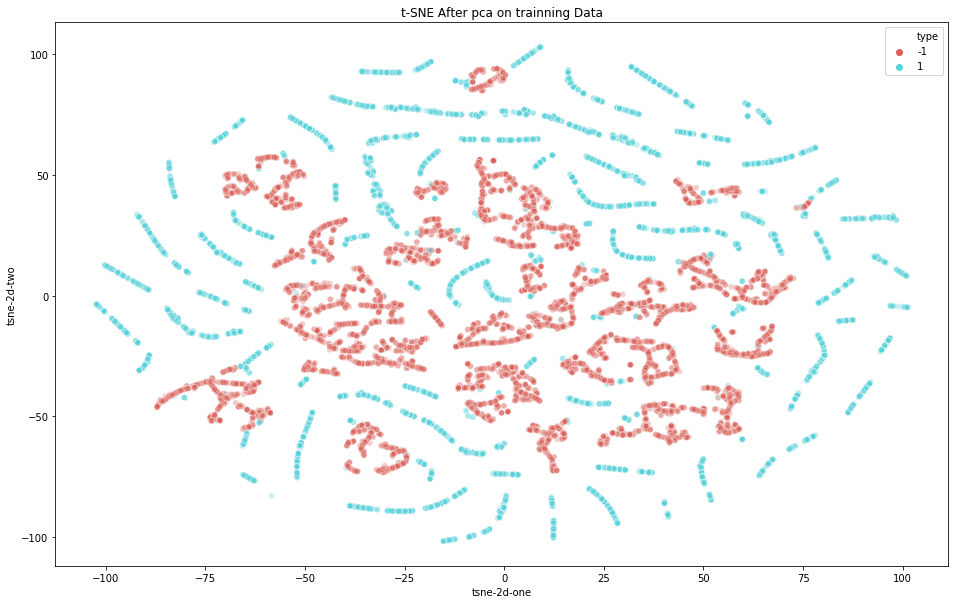

In [24]:
pca_4 = PCA(n_components=4)
x_train_pca_4 = pca_4.fit_transform(re_TrX)
x_test_pca_4 = pca_4.transform(teX)
x_tsne_train_pca_4=TSNE(n_components=2, random_state=0).fit_transform(x_train_pca_4)
train_ts_pca_4=pd.DataFrame()
train_ts_pca_4['tsne-2d-one'] = x_tsne_train_pca_4[:,0]
train_ts_pca_4['tsne-2d-two'] = x_tsne_train_pca_4[:,1]
train_ts_pca_4['type']=re_TrY
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="type",
    palette=sns.color_palette("hls", 2),
    data=train_ts_pca_4,
    legend="full",
    alpha=0.3
)
plt.title('t-SNE After pca on trainning Data')

n_components=7

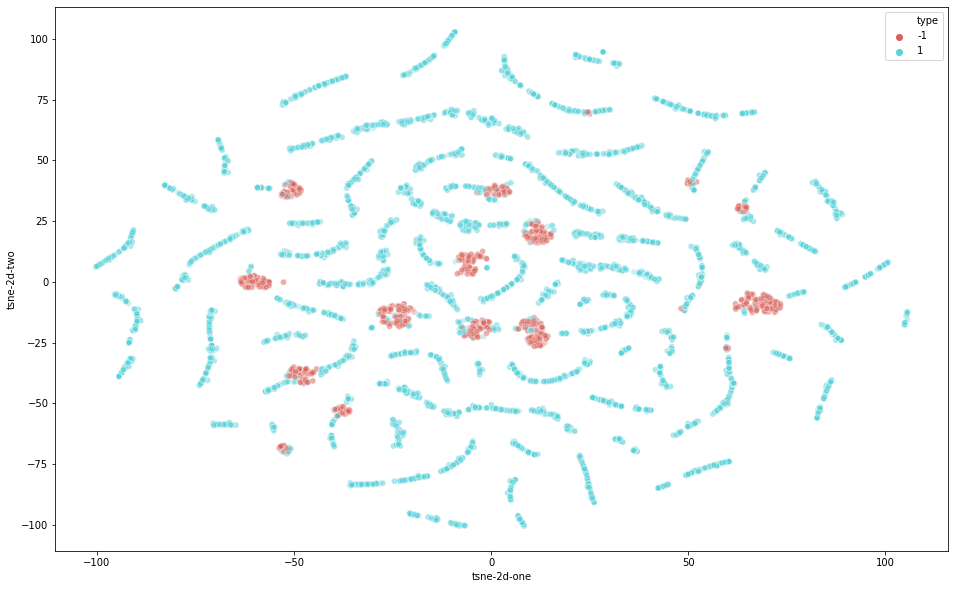

In [25]:
pca_7 = PCA(n_components=7)
x_train_pca_7 = pca_7.fit_transform(trX, trY)
x_test_pca_7 = pca_7.transform(teX)
x_tsne_train_pca_7=TSNE(n_components=2, random_state=0).fit_transform(x_train_pca_7)
train_ts_pca_7=pd.DataFrame()
train_ts_pca_7['tsne-2d-one'] = x_tsne_train_pca_7[:,0]
train_ts_pca_7['tsne-2d-two'] = x_tsne_train_pca_7[:,1]
train_ts_pca_7['type']=trY
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="type",
    palette=sns.color_palette("hls", 2),
    data=train_ts_pca_7,
    legend="full",
    alpha=0.3
)

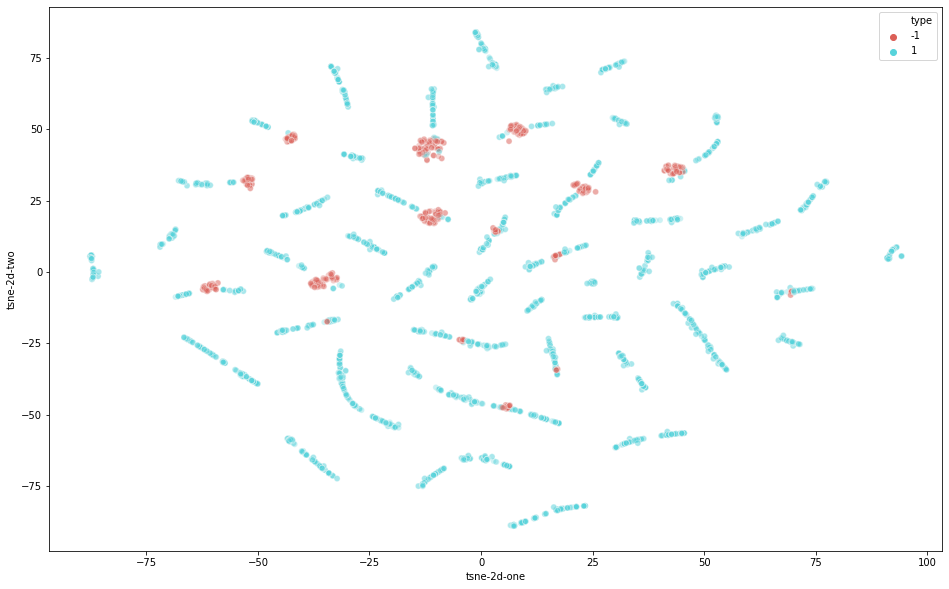

In [26]:
x_tsne_test_pca_7=TSNE(n_components=2, random_state=0).fit_transform(x_test_pca_7)
test_ts_pca_7=pd.DataFrame()
test_ts_pca_7['tsne-2d-one'] = x_tsne_test_pca_7[:,0]
test_ts_pca_7['tsne-2d-two'] = x_tsne_test_pca_7[:,1]
test_ts_pca_7['type']=teY
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="type",
    palette=sns.color_palette("hls", 2),
    data=test_ts_pca_7,
    legend="full",
    alpha=0.3
)

**n_components=9**

Text(0.5, 1.0, 't-SNE After pca on trainning Data')

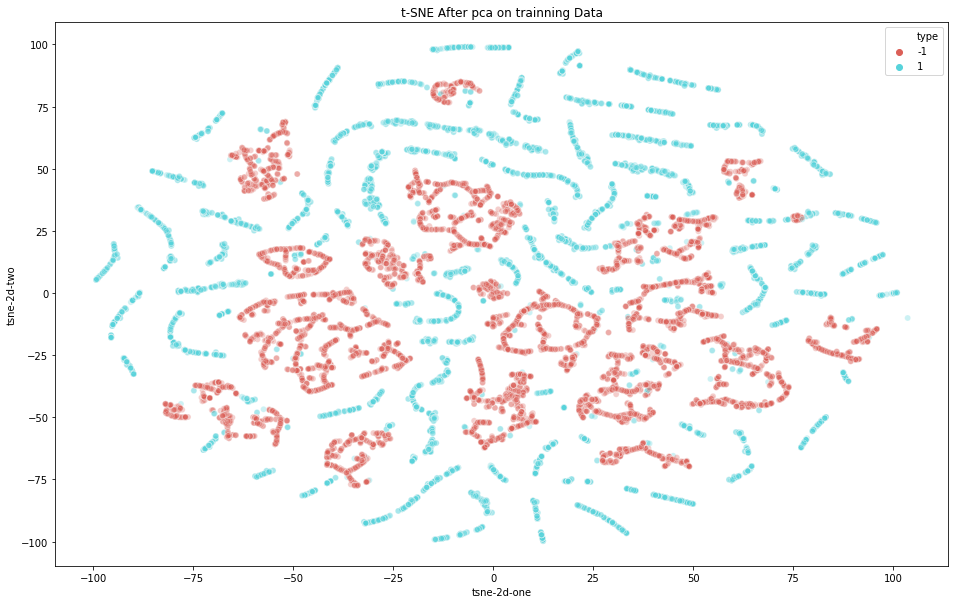

In [27]:
pca_9 = PCA(n_components=9)
x_train_pca_9 = pca_9.fit_transform(re_TrX)
x_test_pca_9 = pca_9.transform(teX)
x_tsne_train_pca_9=TSNE(n_components=2, random_state=0).fit_transform(x_train_pca_9)
train_ts_pca_9=pd.DataFrame()
train_ts_pca_9['tsne-2d-one'] = x_tsne_train_pca_9[:,0]
train_ts_pca_9['tsne-2d-two'] = x_tsne_train_pca_9[:,1]
train_ts_pca_9['type']=re_TrY
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="type",
    palette=sns.color_palette("hls", 2),
    data=train_ts_pca_9,
    legend="full",
    alpha=0.3
)
plt.title('t-SNE After pca on trainning Data')

Text(0.5, 1.0, 't-SNE After pca on testing Data')

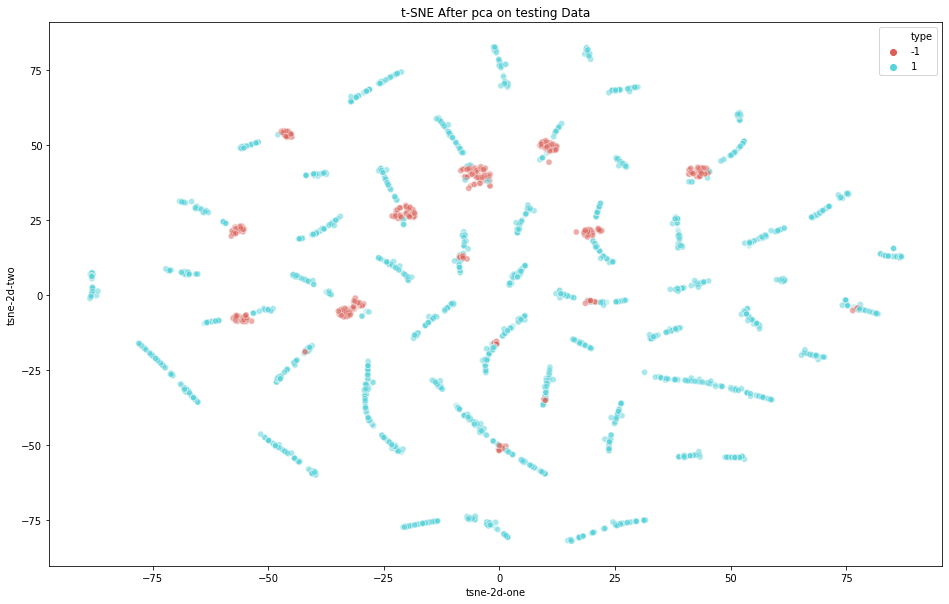

In [28]:
x_tsne_test_pca_9=TSNE(n_components=2, random_state=0).fit_transform(x_test_pca_9)
test_ts_pca_9=pd.DataFrame()
test_ts_pca_9['tsne-2d-one'] = x_tsne_test_pca_9[:,0]
test_ts_pca_9['tsne-2d-two'] = x_tsne_test_pca_9[:,1]
test_ts_pca_9['type']=teY
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="type",
    palette=sns.color_palette("hls", 2),
    data=test_ts_pca_9,
    legend="full",
    alpha=0.3
)
plt.title('t-SNE After pca on testing Data')

**q4**

In [29]:
from sklearn.pipeline import Pipeline
pipe= Pipeline([
    ('pca',PCA(n_components=4)),
    ('clf', KNeighborsClassifier()),
])
pipe.fit(re_TrX, re_TrY)
print(pipe.score(teX, teY))
pipe1= Pipeline([
    ('pca',PCA(n_components=3)),
    ('clf', DecisionTreeClassifier(random_state=rs)),
])
pipe1.fit(re_TrX, re_TrY)
print(pipe1.score(teX, teY))
pipe2= Pipeline([
    ('pca',PCA(n_components=9)),
    ('clf', AdaBoostClassifier(random_state=rs)),
])
pipe2.fit(re_TrX, re_TrY)
print(pipe2.score(teX, teY))


0.979746835443038
0.9818181818181818
0.9256616800920598


accuracy: 98.1%


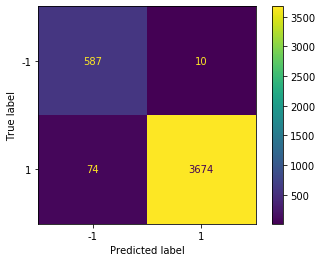

In [30]:
estimators__pipe = [
              ('Pipe1', pipe),
              ('Pipe2',pipe1),('Pipe3',pipe2)]
stacking = StackingClassifier(estimators__pipe, LogisticRegression(random_state=rs), n_jobs=-1)
stacking.fit(re_TrX, re_TrY)
predY_stack = stacking.predict(teX)
acc_pipe = accuracy_score(teY, predY_stack)*100
print(f'accuracy: {acc_pipe:.1f}%')
plot_confusion_matrix(stacking, teX, teY)

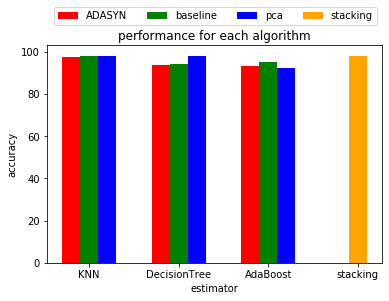

In [31]:
estimator.append("stacking")
x = np.arange(3)
plt.bar(x-0.2,y,width = 0.2,color='red')
plt.bar(x,accuracy,width = 0.2,color='green')
plt.bar(x+0.2,score_model,width = 0.2,color='blue')
plt.bar(3,acc_pipe,width=0.2,color='orange')
plt.xticks(np.arange(4),estimator)
plt.xlabel('estimator')
plt.ylabel("accuracy")
plt.title('performance for each algorithm')
plt.legend(["ADASYN","baseline","pca","stacking"],bbox_to_anchor =(1, 1.2),ncol = 4)
plt.show()

# Part 2

### Q1

In [32]:
from tqdm.auto import tqdm

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [34]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
x_train = scaler.fit_transform(trX)
x_test = scaler.transform(teX)

In [102]:
# Use Grid search CV to find best parameters
mlp = MLPClassifier(activation="tanh", solver='sgd', hidden_layer_sizes=(15,15))
param_grid = {'momentum': np.arange(0.1,1.1,0.1),
              'learning_rate': ['adaptive'],
              'learning_rate_init': np.arange(0.01,1.01,0.01)}
clf = GridSearchCV(estimator = mlp, param_grid = param_grid,n_jobs=-1, cv=3)
clf.fit(x_train, trY)
print("Best Score: ")
print(clf.best_score_)
print("Best Estimator: ")
print(clf.best_estimator_)



Best Score: 
0.8949587981925724
Best Estimator: 
MLPClassifier(activation='tanh', hidden_layer_sizes=(15, 15),
              learning_rate='adaptive', learning_rate_init=0.29000000000000004,
              momentum=0.7000000000000001, solver='sgd')


In [ ]:
MLPClassifier(activation='tanh', hidden_layer_sizes=(15, 15),
              learning_rate='adaptive', learning_rate_init=0.29000000000000004,
              momentum=0.7000000000000001, solver='sgd')

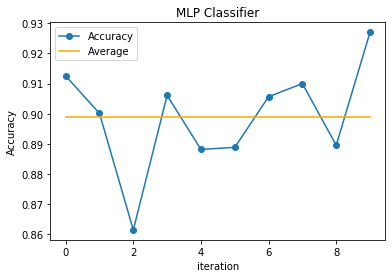

Accuracy equals 0.8989413118527043


In [35]:
accuracy = []
x_axis = []
average = []
clff=[]
for i in tqdm(range(0,10)):
    clf = MLPClassifier(activation='tanh', hidden_layer_sizes=(15, 15),
              learning_rate='adaptive', learning_rate_init=0.294,
              momentum=0.71, solver='sgd').fit(x_train, trY)
    clf.predict(x_test)
    score = clf.score(x_test, teY)
    accuracy.append(score)
    x_axis.append(i)
    clff.append(clf)
fig, ax = plt.subplots()
average_acc = sum(accuracy)/len(accuracy)
average = [average_acc] * 10
ax.plot(x_axis, accuracy, 'o-', label='Accuracy')
ax.plot(x_axis ,average,color='orange',  label="Average")
plt.title('MLP Classifier')
plt.xlabel('iteration')
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print('Accuracy equals', average_acc)

Accuracy: 92.70%


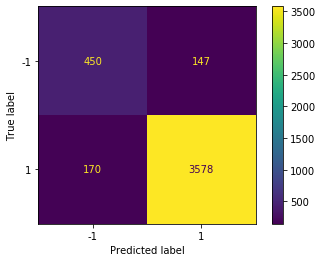

In [36]:
max_acc=max(accuracy)
clf.predict(x_test)
score = clff[accuracy.index(max_acc)].score(x_test, teY)*100
print(f'Accuracy: {score:.2f}%')
plot_confusion_matrix(clff[accuracy.index(max_acc)], x_test, teY)

In [37]:
mlp_cf=clff[accuracy.index(max_acc)]
mlp_cf

MLPClassifier(activation='tanh', hidden_layer_sizes=(15, 15),
              learning_rate='adaptive', learning_rate_init=0.294, momentum=0.71,
              solver='sgd')

### Q2

In [38]:
!pip install --upgrade scikit-learn==0.22

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
  Rolling back uninstall of scikit-learn
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\scikit_learn-1.0.1.dist-info\
   from c:\users\ahmed\anaconda3\lib\site-packages\~cikit_learn-1.0.1.dist-info
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\.libs\
   from c:\users\ahmed\anaconda3\lib\site-packages\sklearn\~libs
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\__check_build\
   from c:\users\ahmed\anaconda3\lib\site-packages\sklearn\~_check_build
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\__init__.py
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\__init__.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\__pycache__\
   from c:\users\ahmed\anaconda3\lib\site-packages\sklearn\~_pycache__
  Moving to c:\users\ahmed\anacon

   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\datasets\_kddcup99.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\datasets\_lfw.py
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\datasets\_lfw.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\datasets\_olivetti_faces.py
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\datasets\_olivetti_faces.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\datasets\_openml.py
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\datasets\_openml.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\datasets\_rcv1.py
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\datasets\_rcv1.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\datasets\_samples_generator.py
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\datasets\_samples_generator.py
  Moving to c:\users\ahmed\anaconda3\lib\site

   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\datasets\tests\test_kddcup99.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\datasets\tests\test_lfw.py
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\datasets\tests\test_lfw.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\datasets\tests\test_olivetti_faces.py
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\datasets\tests\test_olivetti_faces.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\datasets\tests\test_openml.py
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\datasets\tests\test_openml.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\datasets\tests\test_rcv1.py
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\datasets\tests\test_rcv1.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\datasets\tests\test_samples_generator.py
   from C:\Users\Ahmed\AppData\Local\Temp

   from c:\users\ahmed\anaconda3\lib\site-packages\sklearn\~ree
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\utils\__init__.py
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\utils\__init__.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\utils\__pycache__\
   from c:\users\ahmed\anaconda3\lib\site-packages\sklearn\utils\~_pycache__
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\utils\_arpack.py
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\utils\_arpack.py
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\utils\_cython_blas.cp37-win_amd64.pyd
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\utils\_cython_blas.cp37-win_amd64.pyd
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\utils\_cython_blas.pxd
   from C:\Users\Ahmed\AppData\Local\Temp\pip-uninstall-s4go8gvc\utils\_cython_blas.pxd
  Moving to c:\users\ahmed\anaconda3\lib\site-packages\sklearn\utils\_enc

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\ahmed\\anaconda3\\Lib\\site-packages\\sklearn\\cluster\\_k_means_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [39]:
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [40]:
def select_feature(fs, model):
    fs.fit(x_train, trY)
    train_new = fs.transform(x_train)
    test_new = fs.transform(x_test) 
    model.fit(train_new, trY)
    yPred = model.predict(test_new)
    acc = accuracy_score(teY, yPred) * 100
    return acc

In [41]:
model_scores= []
for i in tqdm(range(3,9)):
    clf = MLPClassifier(activation='tanh', hidden_layer_sizes=(15, 15),
          learning_rate='adaptive', learning_rate_init=0.294,
          momentum=0.71, solver='sgd').fit(x_train, trY)
    sfs = SFS(clf,k_features=i,forward=True)
    model_scores.append(select_feature(sfs, clf))


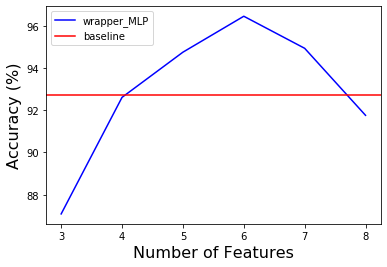

Maximum accuracy: 96.5% 
Best number of features: 6


In [42]:
max_accuracy=max(model_scores)
index_best_com = model_scores.index(max_accuracy)+3
# Plot a simple line chart
plt.plot(range(3,9), model_scores, 'b', label='wrapper_MLP')
# Plot another line on the same chart/graph
plt.axhline( y=score,c='r', label='baseline')
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16) 
plt.legend()
plt.show()
print(f"Maximum accuracy: {max_accuracy:.1f}% \nBest number of features: {index_best_com}")

In [43]:
sfs = SFS(clf,k_features=index_best_com,forward=True)
sfs.fit(x_train, trY)
train_sfs = sfs.transform(x_train)
test_sfs = sfs.transform(x_test) 

Accuracy: 95.24%


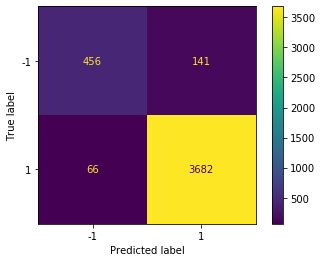

In [50]:
clf.fit(train_sfs, trY)
yPred = clf.predict(test_sfs)
best_acc = accuracy_score(teY, yPred) * 100
print(f'Accuracy: {best_acc:.2f}%')
plot_confusion_matrix(clf, test_sfs, teY)

## point 3

In [51]:
!pip install sklearn_som

In [58]:
tr_x = pd.DataFrame(train_sfs) 
te_x = pd.DataFrame(test_sfs)

In [60]:
from sklearn_som.som import SOM
som_k_accuracy = []
for i in tqdm(range(2, 9)):
    xtrain_som, xtest_som = tr_x.copy(), te_x.copy()
    som = SOM(m = i, n = i, dim = tr_x.shape[1], random_state = 0)
    y_pred_som_train = som.fit_predict(train_sfs)
    y_pred_som_test = som.predict(test_sfs)
    xtrain_som['cluster'] =  y_pred_som_train
    xtest_som['cluster'] =  y_pred_som_test
    accuracy_mlp = []
    for j in range(0,10):
        mlp_classifier = MLPClassifier(activation='tanh', hidden_layer_sizes=(15, 15),
          learning_rate='adaptive', learning_rate_init=0.294,
          momentum=0.71, solver='sgd')
        mlp_classifier.fit(train_sfs, trY)
        y_pred_mlp = mlp_classifier.predict(test_sfs)
        accuracy=accuracy_score(teY, y_pred_mlp)*100
        accuracy_mlp.append(accuracy)
    som_k_accuracy.append(sum(accuracy_mlp)/len(accuracy_mlp))
som_k_accuracy

[94.36133486766398,
 94.39585730724971,
 94.74338319907939,
 95.04718066743382,
 94.08745684695052,
 94.12658227848102,
 94.48331415420023]

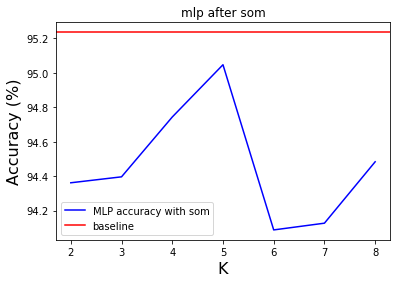

In [61]:
# Plot a simple line chart
plt.plot(range(2,9), som_k_accuracy, 'b', label='MLP accuracy with som')
# Plot another line on the same chart/graph
plt.title('mlp after som')
plt.axhline( y=best_acc,c='r', label='baseline')
plt.xlabel("K", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16) 
plt.legend()
plt.show()

In [65]:
xtrain_som, xtest_som = tr_x.copy(), te_x.copy()
som = SOM(m = 5, n = 5, dim = tr_x.shape[1], random_state = 0)
y_pred_som_train = som.fit_predict(train_sfs)
y_pred_som_test = som.predict(test_sfs)
xtrain_som['cluster'] =  y_pred_som_train
xtest_som['cluster'] =  y_pred_som_test
accuracy_mlp = []
for j in range(0,10):
    mlp_classifier = MLPClassifier(activation='tanh', hidden_layer_sizes=(15, 15),
      learning_rate='adaptive', learning_rate_init=0.294,
      momentum=0.71, solver='sgd')
    mlp_classifier.fit(train_sfs, trY)
    y_pred_mlp = mlp_classifier.predict(test_sfs)
    accuracy=accuracy_score(teY, y_pred_mlp)*100
    accuracy_mlp.append(accuracy)
accuracy_avg = sum(accuracy_mlp)/len(accuracy_mlp)

In [66]:
print(f'Average Accuracy: {accuracy_avg:.2f}%')

Average Accuracy: 95.59%


## Point 4

In [71]:
average_accuraces = []

#### Hidden Layer = 3

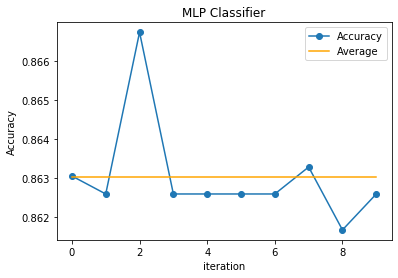

Average Accuracy: 86.30%


In [72]:
accuracy3 = []
x_axis = []
clff3=[]
for i in tqdm(range(0,10)):
    clf = MLPClassifier(activation='tanh',
                        hidden_layer_sizes=(10, 10, 10),
                        learning_rate='adaptive', learning_rate_init=0.294,
                        momentum=0.71, solver='sgd').fit(xtrain_som, trY)
    clf.predict(xtest_som)
    score3 = clf.score(xtest_som, teY)
    accuracy3.append(score3)
    x_axis.append(i)
    clff3.append(clf)
fig, ax = plt.subplots()
average_acc3 = sum(accuracy3)/len(accuracy3)
average_accuraces.append(average_acc3*100)
average3 = [average_acc3] * 10
ax.plot(x_axis, accuracy3, 'o-', label='Accuracy')
ax.plot(x_axis ,average3,color='orange',  label="Average")
plt.title('MLP Classifier')
plt.xlabel('iteration')
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(f'Average Accuracy: {average_acc3*100:.2f}%')

#### Hidden Layer= 4

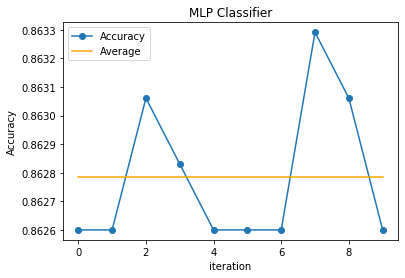

Average Accuracy: 86.28%


In [73]:
accuracy4 = []
x_axis = []
clff4=[]
for i in tqdm(range(0,10)):
    clf = MLPClassifier(activation='tanh',
                        hidden_layer_sizes=(10, 10, 10, 10),
                        learning_rate='adaptive', learning_rate_init=0.294,
                        momentum=0.71, solver='sgd').fit(xtrain_som, trY)
    clf.predict(xtest_som)
    score4 = clf.score(xtest_som, teY)
    accuracy4.append(score4)
    x_axis.append(i)
    clff4.append(clf)
fig, ax = plt.subplots()
average_acc4 = sum(accuracy4)/len(accuracy4)
average_accuraces.append(average_acc4*100)
average4 = [average_acc4] * 10
ax.plot(x_axis, accuracy4, 'o-', label='Accuracy')
ax.plot(x_axis ,average4,color='orange',  label="Average")
plt.title('MLP Classifier')
plt.xlabel('iteration')
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(f'Average Accuracy: {average_acc4*100:.2f}%')

#### Hidden Layer= 5

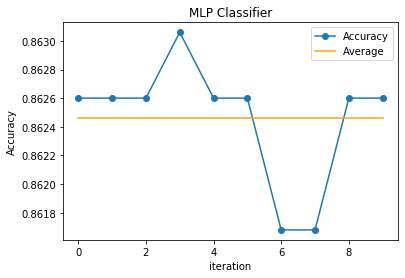

Average Accuracy: 86.25%


In [74]:
accuracy5 = []
x_axis = []
clff5=[]
for i in tqdm(range(0,10)):
    clf = MLPClassifier(activation='tanh',
                        hidden_layer_sizes=(10, 10, 10, 10, 10),
                        learning_rate='adaptive', learning_rate_init=0.294,
                        momentum=0.71, solver='sgd').fit(xtrain_som, trY)
    clf.predict(xtest_som)
    score5 = clf.score(xtest_som, teY)
    accuracy5.append(score5)
    x_axis.append(i)
    clff5.append(clf)
fig, ax = plt.subplots()
average_acc5 = sum(accuracy5)/len(accuracy5)
average_accuraces.append(average_acc5*100)
average5 = [average_acc5] * 10
ax.plot(x_axis, accuracy5, 'o-', label='Accuracy')
ax.plot(x_axis ,average5,color='orange',  label="Average")
plt.title('MLP Classifier')
plt.xlabel('iteration')
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(f'Average Accuracy: {average_acc5*100:.2f}%')

### Hidden Layer = 6

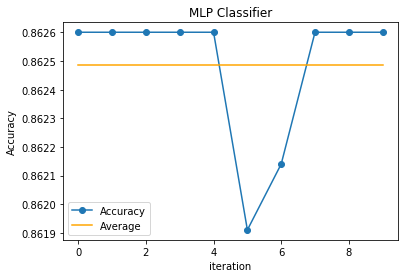

Average Accuracy: 86.25%


In [77]:
accuracy6 = []
x_axis = []
clff6=[]
for i in tqdm(range(0,10)):
    clf = MLPClassifier(activation='tanh',
                        hidden_layer_sizes=(10, 10, 10, 10, 10, 10),
                        learning_rate='adaptive', learning_rate_init=0.294,
                        momentum=0.71, solver='sgd').fit(xtrain_som, trY)
    clf.predict(xtest_som)
    score6 = clf.score(xtest_som, teY)
    accuracy6.append(score6)
    x_axis.append(i)
    clff6.append(clf)
fig, ax = plt.subplots()
average_acc6 = sum(accuracy6)/len(accuracy6)
average_accuraces.append(average_acc6*100)
average6 = [average_acc6] * 10
ax.plot(x_axis, accuracy6, 'o-', label='Accuracy')
ax.plot(x_axis ,average6,color='orange',  label="Average")
plt.title('MLP Classifier')
plt.xlabel('iteration')
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(f'Average Accuracy: {average_acc6*100:.2f}%')

### Hidden Layer = 7

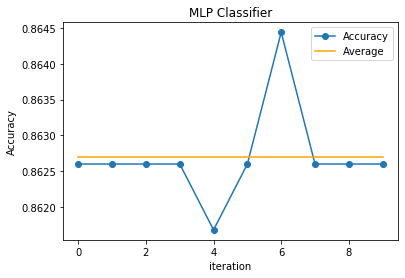

Average Accuracy: 86.27%


In [78]:
accuracy7 = []
x_axis = []
clff7=[]
for i in tqdm(range(0,10)):
    clf = MLPClassifier(activation='tanh',
                        hidden_layer_sizes=(10, 10, 10,10, 10, 10, 10),
                        learning_rate='adaptive', learning_rate_init=0.294,
                        momentum=0.71, solver='sgd').fit(xtrain_som, trY)
    clf.predict(xtest_som)
    score7 = clf.score(xtest_som, teY)
    accuracy7.append(score7)
    x_axis.append(i)
    clff7.append(clf)
fig, ax = plt.subplots()
average_acc7 = sum(accuracy7)/len(accuracy7)
average_accuraces.append(average_acc7*100)
average7 = [average_acc7] * 10
ax.plot(x_axis, accuracy7, 'o-', label='Accuracy')
ax.plot(x_axis ,average7,color='orange',  label="Average")
plt.title('MLP Classifier')
plt.xlabel('iteration')
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(f'Average Accuracy: {average_acc7*100:.2f}%')

### Hidden Layer = 8

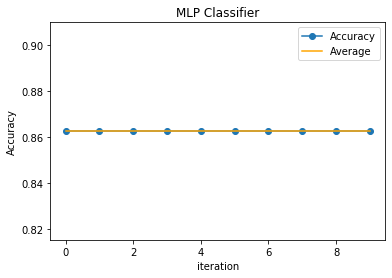

Average Accuracy: 86.26%


In [80]:
accuracy8 = []
x_axis = []
clff8=[]
for i in tqdm(range(0,10)):
    clf = MLPClassifier(activation='tanh',
                        hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10),
                        learning_rate='adaptive', learning_rate_init=0.294,
                        momentum=0.71, solver='sgd').fit(xtrain_som, trY)
    clf.predict(xtest_som)
    score8 = clf.score(xtest_som, teY)
    accuracy8.append(score8)
    x_axis.append(i)
    clff8.append(clf)
fig, ax = plt.subplots()
average_acc8 = sum(accuracy8)/len(accuracy8)
average_accuraces.append(average_acc8*100)
average8 = [average_acc8] * 10
ax.plot(x_axis, accuracy8, 'o-', label='Accuracy')
ax.plot(x_axis ,average8,color='orange',  label="Average")
plt.title('MLP Classifier')
plt.xlabel('iteration')
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(f'Average Accuracy: {average_acc8*100:.2f}%')

### Hidden Layer = 9

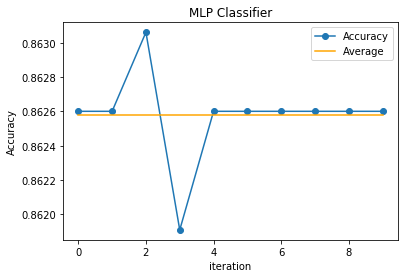

Average Accuracy: 86.26%


In [81]:
accuracy9 = []
x_axis = []
clff9=[]
for i in tqdm(range(0,10)):
    clf = MLPClassifier(activation='tanh',
                        hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10),
                        learning_rate='adaptive', learning_rate_init=0.294,
                        momentum=0.71, solver='sgd').fit(xtrain_som, trY)
    clf.predict(xtest_som)
    score9 = clf.score(xtest_som, teY)
    accuracy9.append(score9)
    x_axis.append(i)
    clff7.append(clf)
fig, ax = plt.subplots()
average_acc9 = sum(accuracy9)/len(accuracy9)
average_accuraces.append(average_acc9*100)
average9 = [average_acc9] * 10
ax.plot(x_axis, accuracy9, 'o-', label='Accuracy')
ax.plot(x_axis ,average9,color='orange',  label="Average")
plt.title('MLP Classifier')
plt.xlabel('iteration')
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(f'Average Accuracy: {average_acc9*100:.2f}%')

### Hidden Layer = 10

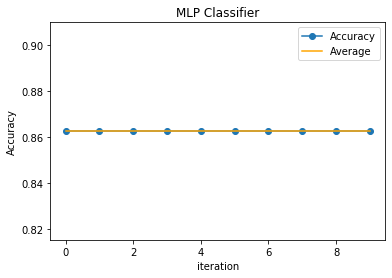

Average Accuracy: 86.26%


In [88]:
accuracy10 = []
x_axis = []
clff10=[]
for i in tqdm(range(0,10)):
    clf = MLPClassifier(activation='tanh',
                        hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10),
                        learning_rate='adaptive', learning_rate_init=0.294,
                        momentum=0.71, solver='sgd').fit(xtrain_som, trY)
    clf.predict(xtest_som)
    score10 = clf.score(xtest_som, teY)
    accuracy10.append(score10)
    x_axis.append(i)
    clff10.append(clf)
fig, ax = plt.subplots()
average_acc10 = sum(accuracy10)/len(accuracy10)
average_accuraces.append(average_acc10*100)
average10 = [average_acc10] * 10
ax.plot(x_axis, accuracy10, 'o-', label='Accuracy')
ax.plot(x_axis ,average10,color='orange',  label="Average")
plt.title('MLP Classifier')
plt.xlabel('iteration')
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(f'Average Accuracy: {average_acc10*100:.2f}%')

In [89]:
average_accuraces

[86.30379746835443,
 86.27848101265825,
 86.24626006904487,
 86.24856156501727,
 86.2692750287687,
 86.26006904487917,
 86.2577675489068,
 86.26006904487917]

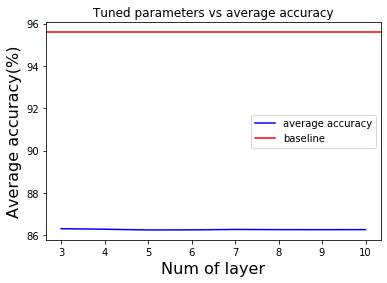

In [90]:
# Plot a simple line chart
plt.plot(range(3,11), average_accuraces, 'b', label='average accuracy')
# Plot another line on the same chart/graph
plt.title('Tuned parameters vs average accuracy')
plt.axhline(y=accuracy_avg, c='r', label='baseline')
plt.xlabel("Num of layer", fontsize=16)
plt.ylabel("Average accuracy(%)", fontsize=16) 
plt.legend()
plt.show()

In [93]:
accuracy= []
x_axis = []
for i in tqdm(range(0,10)):
    for j in range(10,31):
        clf = MLPClassifier(activation='tanh',
                            hidden_layer_sizes=(j, j, j),
                            learning_rate='adaptive', learning_rate_init=0.294,
                            momentum=0.71, solver='sgd').fit(xtrain_som, trY)
        clf.predict(xtest_som)
        score = clf.score(xtest_som, teY)
        accuracy.append(score)
        x_axis.append(i)

In [100]:
accuracies = [x*100 for x in accuracy]


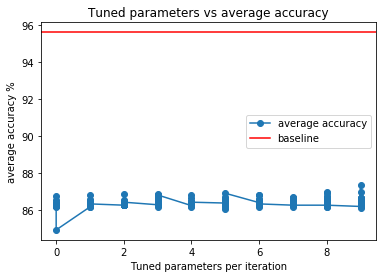

Average Accuracy: 86.26%


In [107]:
fig, ax = plt.subplots()
average_acc = sum(accuracy)/len(accuracy)
average_accuraces.append(average_acc10*100)
average10 = [average_acc] * 10
ax.plot(x_axis, accuracies, 'o-', label='average accuracy')
plt.axhline(y=accuracy_avg, c='r', label='baseline')
plt.title('Tuned parameters vs average accuracy')
plt.xlabel('Tuned parameters per iteration')
plt.ylabel("average accuracy %")
plt.legend()
plt.show()
print(f'Average Accuracy: {average_acc10*100:.2f}%')